# 4.2 Exercises: Predicting Fuel Efficiency
# Rahul Rajeev

In [96]:
# libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [97]:
# 1. load the data as a pandas dataframe
autompg = pd.read_csv('auto-mpg.csv')
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [98]:
# 2. Remove car name column, replace strings in horsepower column with column mean, create dummy variables for the origin column

# remove car name column
autompg = autompg.drop('car name', axis = 1)

In [99]:
# the reason why the horsepower column is in string is most likely one of the observations was recorded as a string, and the 
# dataset would've converted the rest to make sure that it is safe.

# I found while performing some operations that an observation was labeled as ? as a string

# replace string with NaN
autompg['horsepower'] = autompg['horsepower'].replace('?', np.NaN)

# replacing string with float
autompg['horsepower'] = autompg['horsepower'].apply(float)

# replacing NaN with mean
autompg['horsepower'] = autompg['horsepower'].replace(np.NaN, autompg['horsepower'].mean())

In [100]:
# dummy variables for origin
autompg['origin'].value_counts()

# is the origin column already in dummy form? it appears to be assigned numbers from 1 - 3

1    249
3     79
2     70
Name: origin, dtype: int64

In [101]:
# 3. create a correlation coefficient matrix and/or visualization
# are there features highly correlated with mpg

corr = autompg.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [102]:
# visualizing the correlation matrix
corr.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


**Features that are highly correlated with mpg:** cylinders, displacement, horsepower, and weight all have strong negative correlation with mpg.

Text(0.5, 0, 'Weight')

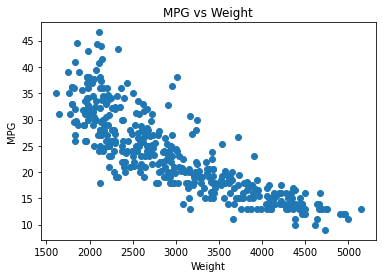

In [103]:
# 4. Plot mpg vs. weight and analyze how it relates to the corresponding correlation coefficient
plt.scatter(autompg['weight'], autompg['mpg'])
plt.title('MPG vs Weight')
plt.ylabel('MPG')
plt.xlabel('Weight')

The correlation coefficient is accurate as the data has a strong negative correlation.

In [104]:
# 5. randomly split the data into 80% training and 20% test, where the target is mpg
train, test = train_test_split(autompg, test_size=0.2)
target = train['mpg']
target2 = test['mpg']

In [105]:
# 6. train an ordinary linear regression on the training data
features = train.iloc[:,[1,2,3,4,5,6,7]]
features2 = test.iloc[:,[1,2,3,4,5,6,7]]
features

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
40,8,351.0,153.0,4154,13.5,71,1
391,4,135.0,84.0,2370,13.0,82,1
305,4,151.0,90.0,2670,16.0,79,1
278,4,89.0,71.0,1990,14.9,78,2
233,4,97.0,78.0,1940,14.5,77,2
...,...,...,...,...,...,...,...
10,8,383.0,170.0,3563,10.0,70,1
93,8,318.0,150.0,4237,14.5,73,1
249,8,260.0,110.0,3365,15.5,78,1
5,8,429.0,198.0,4341,10.0,70,1


In [106]:
# loading linear regression model and fitting the features to the target
linreg = LinearRegression()
linmodel = linreg.fit(features,target)

In [107]:
# the coefficients of the results for train
linmodel.coef_

array([-0.37928848,  0.01928532, -0.01586248, -0.00663914,  0.11106009,
        0.7314984 ,  1.57310924])

In [108]:
# 7. calculate r2, rmse, and mae on the training and test sets and interpret results
predictions = linmodel.predict(features)

# train results
print('R2:', r2_score(target, predictions), '| RMSE:', mean_squared_error(target, predictions, squared = False), 
      '| MAE:', mean_absolute_error(target, predictions))

R2: 0.8328831146134447 | RMSE: 3.2737696283564297 | MAE: 2.4959995959049945


In [109]:
# test results
predictions2 = linmodel.predict(features2)

print('R2:', r2_score(target2, predictions2), '| RMSE:', mean_squared_error(target2, predictions2, squared = False), 
      '| MAE:', mean_absolute_error(target2, predictions2))

R2: 0.7513829170844841 | RMSE: 3.4553866807877345 | MAE: 2.6139856792051206


The R2 score for both the training and test set were relatively close to 1, which is a good fit, but clearly not the best. The mean squared error is a little high. But the mean absolute error is small meaning that the predictions are pretty good, however, it is a bit far from 0 ideally.

In [110]:
# 8. repeating previous 2 steps with a different model

# choosing to use a 3rd degree polynomial
polynomial = PolynomialFeatures(degree=3, include_bias = False)

# train
poly_features = polynomial.fit_transform(features)
polymodel = linreg.fit(poly_features, target)

poly_predictions = polymodel.predict(poly_features)

print('R2:', r2_score(target, poly_predictions), '| RMSE:', mean_squared_error(target, poly_predictions, squared = False), 
      '| MAE:', mean_absolute_error(target, poly_predictions))

R2: 0.9501578238619353 | RMSE: 1.78787209768931 | MAE: 1.283164869097001


In [111]:
# test
poly_features2 = polynomial.fit_transform(features2)

poly_predictions2 = polymodel.predict(poly_features2)

print('R2:', r2_score(target2, poly_predictions2), '| RMSE:', mean_squared_error(target2, poly_predictions2, squared = False), 
      '| MAE:', mean_absolute_error(target2, poly_predictions2))

R2: 0.8041450735737645 | RMSE: 3.0668915692142 | MAE: 2.3186308905901383


The R2 of both sets have increased and the RMSE and MAE are lowered from before. The polynomial model could be a better fit.